In [27]:
from scipy.io import loadmat
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import sys
sys.path.append('/Users/diegofiori/Desktop/epfl/master_thesis/master_thesis/')
from utils import read_pickle
import matplotlib.pyplot as plt

In [2]:
sim_code_train = 'cs'
sim_code_test = 'em'

In [3]:
def load_k_perp(sim_code, before=False):
    if before:
        x1 = loadmat(f'/Users/diegofiori/Desktop/epfl/master_thesis/k_perp_{sim_code}1.mat')['k_quantities']
        x2 = loadmat(f'/Users/diegofiori/Desktop/epfl/master_thesis/k_perp_{sim_code}2.mat')['k_quantities']
        y = np.concatenate([x1, x2])
    else:
        x = loadmat(f'/Users/diegofiori/Desktop/epfl/master_thesis/k_perp_{sim_code}.mat')
        y = x['k_quantities']
    return y

In [4]:
y_train = load_k_perp(sim_code_train)

In [5]:
y_test = load_k_perp(sim_code_test, True)

In [6]:
path = '/Users/diegofiori/Desktop/epfl/master_thesis/results/'
X_train = read_pickle(path+f'slices_top_features_{sim_code_train}.pickle')
X_test = read_pickle(path+f'slices_top_features_{sim_code_test}.pickle')

In [7]:
X_train.shape

(3, 150720, 34)

In [8]:
features_to_keep = read_pickle(path+f'selected_index_{sim_code_train}.pickle')

In [9]:
n_fields, n_slices, n_features = 3, 80, 34

In [10]:
X_train = [X_train[idx[0], :, idx[1]].reshape((-1, n_slices)) for idx in features_to_keep]
X_train = np.concatenate(X_train, axis=1)

In [11]:
X_test = [X_test[idx[0], :, idx[1]].reshape((-1, n_slices)) for idx in features_to_keep]
X_test = np.concatenate(X_test, axis=1)

In [12]:
y_train = y_train[:len(X_train)]
y_test = y_test[:len(X_test)]
y1_train = y_train[:, 0]
y2_train = y_train[:, 1]
y1_test = y_test[:, 0]
y2_test = y_test[:, 1]

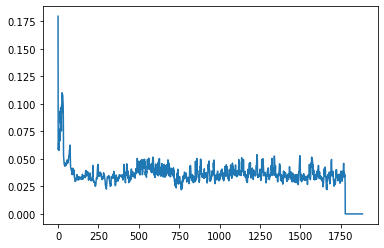

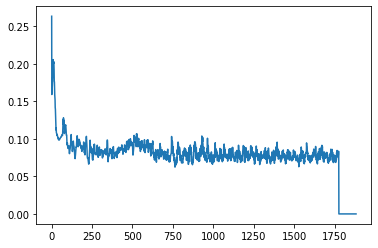

In [13]:
plt.figure()
plt.plot(y1_train)
plt.figure()
plt.plot(y2_train)

In [14]:
X_train = np.nan_to_num(X_train)

In [ ]:
# delete from test the zeros
y_to_keep = np.any(y_train!=0, axis=1)
y1_train = y1_train[y_to_keep]
y2_train = y2_train[y_to_keep]
X_train = X_train[y_to_keep]

In [16]:
model_1 = RandomForestRegressor(n_estimators=100)
model_2 = RandomForestRegressor(n_estimators=100)
model_1.fit(X_train, y1_train)
model_2.fit(X_train, y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

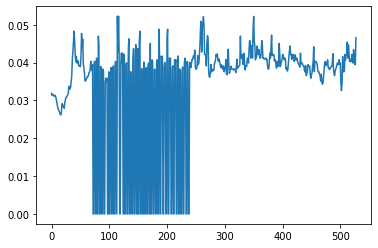

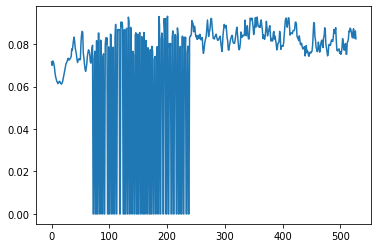

In [17]:
plt.figure()
plt.plot(y1_test)
plt.figure()
plt.plot(y2_test)

In [19]:
# delete from test the zeros
y_to_keep = np.any(y_test!=0, axis=1)
y1_test = y1_test[y_to_keep]
y2_test = y2_test[y_to_keep]
X_test = X_test[y_to_keep]

In [20]:
model_1.score(X_test, y1_test)

-10.544698768592681

In [21]:
model_2.score(X_test, y2_test)

-5.2872361668310015

In [22]:
mean_absolute_error(y1_test, model_1.predict(X_test))

0.012936497920019675

In [23]:
mean_absolute_error(y2_test, model_2.predict(X_test))

0.009702789379934004

In [25]:
model_1.predict(X_test[19:20])

array([0.03792196])

In [37]:
y1_test[19]

0.02892138924211368

In [35]:
model_2.predict(X_test[19:20])

array([0.11145928])

In [38]:
y2_test[19]

0.06211410994004246